In [1]:
# Import useful userpackages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from time import time
import warnings
warnings.filterwarnings("ignore")

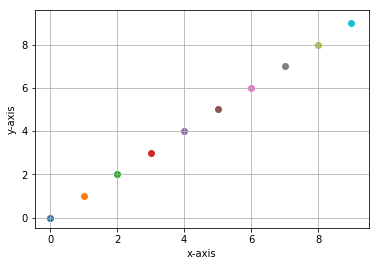

In [2]:
def roundLine(start, end):
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    distance = max(abs(dx), abs(dy))
    for i in range(distance):
        x = int(start[0] + (float(i) / distance) * dx)
        y = int(start[1] + (float(i) / distance) * dy)
        plt.scatter(x,y)
roundLine([0,0],[10,10])
plt.grid(True)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

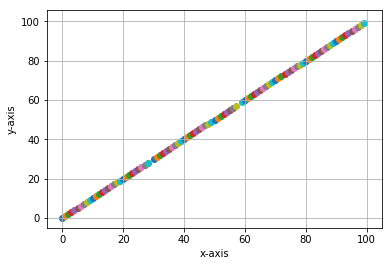

In [3]:
def roundLine(start, end):
    dx = end[0] - start[0]
    dy = end[1] - start[1]
    distance = max(abs(dx), abs(dy))
    for i in range(distance):
        x = int(start[0] + (float(i) / distance) * dx)
        y = int(start[1] + (float(i) / distance) * dy)
        plt.scatter(x,y)
roundLine([0,0],[100,100])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.show()

# 1. Data Visualisation

In [4]:
# 1. Data Visualisation
# import MNIST dataset
data = pd.read_csv('train.csv')

In [5]:
# Observe the first five rows of data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data[41978:41983]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41978,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41979,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41980,7,0,0,0,0,0,0,0,0,0,...,27,253,110,0,0,0,0,0,0,0
41981,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41982,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Observe the first five rows of test data
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check missing values in the train dataset
data.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
# Check missing values in the test dataset
test_data.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
# Check the size of the dataset
print('The size of the dataset:',data.shape)

The size of the dataset: (42000, 785)


In [8]:
# Split the features and the label in the dataset
dataFeature = data.iloc[:,1:]
dataLabel = data.iloc[:,0]

In [9]:
def importSplit():
    ''' Import dataset, 
    then split the dataset into feature columns and label column'''
    data = pd.read_csv('train.csv')
    
    dataFeature = data.iloc[:,1:]
    dataLabel = data.iloc[:,0]
    return dataFeature, dataLabel

dataFeature, dataLabel = importSplit()

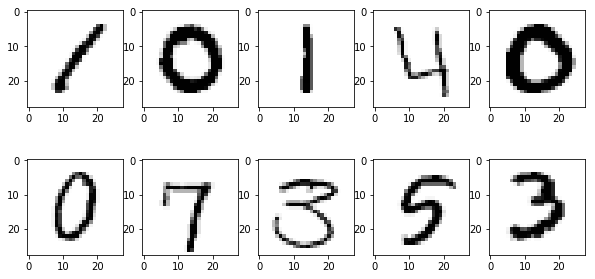

In [10]:
# Glance the digit in the train dataset
plt.figure(figsize=(10,5))

for num in range(0,10):
    plt.subplot(2,5,num+1)
    # Convert 784 vectors into matrices
    grid_data = dataFeature.iloc[num].values.reshape(28,28)
    # black digits with white background
    plt.imshow(grid_data,interpolation = 'none', cmap='Greys')

# 2. Data pre-processing

In [11]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
# Normalise the features into the range from 0 to 1
from sklearn.preprocessing import MinMaxScaler

dataFeature = MinMaxScaler().fit_transform(dataFeature)

In [16]:
dataFeature[784]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04705882, 0.43529412, 0.74509804, 0.04705882, 0.     

In [19]:
n = 0
for i in range(0,784):
    if dataFeature[784][i] == 0:
            n += 1
print(n/784)

0.8354591836734694


In [15]:
# Calculate the amount of pixel which has a value of zero
cnt = 0
for i in range(0,42000):
    for j in range(0,784):
        if dataFeature[i][j] == 0:
            cnt += 1
print(cnt)

26621312


In [17]:
cnt / (42000*784)

0.8084703595724004

In [22]:
# Dimensionality reduction
from sklearn.decomposition import PCA

def dRPCA(x_train, n_components):
    trainData = np.array(x_train)
    
    pca = PCA(n_components=n_components, whiten=False)
    pca.fit(trainData)  # Fit the model with X
    pcaTrainData = pca.transform(trainData) # Transform X

    return pcaTrainData

dataFeature = dRPCA(dataFeature, 0.8)

In [23]:
dataFeature[784]

array([ 1.25893231,  1.11182201,  1.0285362 ,  2.47064788, -0.62561888,
       -2.55924931,  0.35251593,  0.5115519 , -2.03706859, -0.87566667,
       -1.63479624, -0.36810523, -0.52938221,  0.67024575, -0.73296634,
        0.15156185, -0.25849368,  1.10696813, -0.78360842,  0.19657929,
       -0.07151517,  0.72606333,  0.01963199, -0.74739883,  0.30825754,
        0.65584063, -0.9411807 ,  0.50255312,  0.55133849, -0.23372947,
       -0.67315119,  0.06089488, -0.02578546,  0.02095858,  0.6268603 ,
       -0.30850639,  0.44375488, -1.48561278,  0.22871929,  0.21219339,
        0.045853  ,  0.90848755,  0.31021722])

# 3. Modelling

In [25]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Split train dataset and test dataset
xTrain, xTest, yTrain, yTest = train_test_split(dataFeature,dataLabel,test_size=0.1,
                                   random_state=999)

In [26]:
xTrain.shape

(37800, 43)

In [27]:
xTest.shape

(4200, 43)

In [28]:
yTrain.shape

(37800,)

In [29]:
yTest.shape

(4200,)

In [30]:
# KNN modelling
def distance(a,b,p=2):
    return np.sum(np.abs(a-b)**p)**(1/p)

In [38]:
# KNN modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

startTime = time()

knn_model = KNeighborsClassifier()
knn_model.fit(xTrain,yTrain)

yTrainPred = knn_model.predict(xTrain)
yTestPred = knn_model.predict(xTest)

endTime = time()

print ('The accuracy of KNN on test dataset is:', accuracy_score(yTest, yTestPred))
print ('The accuracy of KNN on train dataset is:', accuracy_score(yTrain, yTrainPred))
print ('Time elapsed(s):',endTime - startTime)

The accuracy of KNN on test dataset is: 0.9728571428571429
The accuracy of KNN on train dataset is: 0.9827248677248678
Time elapsed(s): 158.12789678573608


In [26]:
# SVM modelling
from sklearn.svm import SVC

startTime = time()

SVM_model = SVC()
SVM_model.fit(X_train,y_train)

y_train_SVMpred = SVM_model.predict(X_train)
y_test_SVMpred = SVM_model.predict(X_test)

endTime = time()

print ('The accuracy of SVM on test dataset is:', accuracy_score(y_test, y_test_SVMpred))
print ('The accuracy of SVM on train dataset is:', accuracy_score(y_train, y_train_SVMpred))
print ('Time elasped(s):',endTime - startTime)

The accuracy of SVM on test dataset is: 0.9792857142857143
The accuracy of SVM on train dataset is: 0.9896031746031746
Time elasped(s): 60.043840169906616


In [31]:
# KNN modelling - modify the value of PCA n_components

# Set up a list to store accuracy scores
KNN_score_list = []
# Set up a list storing different values of n_components
n_components = np.linspace(0.1,0.9,num=10,endpoint=False)

def KNN_accuracy(n, X_train, X_test, y_train, y_test):
    # Record start time     
    startTime = time()
    # Dimensionality reduction: n_components = n
    pca = PCA(n_components = n)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train,y_train)

    y_train_KNNpred = knn_model.predict(X_train)
    y_test_KNNpred = knn_model.predict(X_test)

    train_accuracy = accuracy_score(y_train_KNNpred,y_train)
    test_accuracy = accuracy_score(y_test_KNNpred, y_test)
    
    endTime = time()
    print('n_components:{:.2f} , test_accuracy:{:.4f} , train_accuracy:{:.4f} ,time elaps:{:.2f}s'.format(n, test_accuracy, train_accuracy, endTime - startTime))
    return test_accuracy,train_accuracy 

for n in n_components:
    test_accuracy, train_accuracy = KNN_accuracy(n,X_train, X_test, y_train, y_test)
    KNN_score_list.append([test_accuracy, train_accuracy])  


n_components:0.10 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:141.14s
n_components:0.18 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:128.75s
n_components:0.26 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:129.49s
n_components:0.34 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:117.09s
n_components:0.42 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:117.32s
n_components:0.50 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:117.48s
n_components:0.58 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:117.09s
n_components:0.66 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:117.19s
n_components:0.74 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:183.06s
n_components:0.82 , test_accuracy:0.9729 , train_accuracy:0.9827 ,time elaps:126.11s
